# ITA_weather project data analysis
## In this part we perform final manipulations of the dataframes and data analysis. 

In [1]:
import numpy as np
import pandas as pd
import glob
import os

## First of all we need to upload dataframes with quarterly dataframes that we created in "ITA_weather data processing" notebook.

In [2]:
path='d:\moje_dokumenty\Desktop\IES\semester 11\Python\project\First_q\ '  # make your own path to the data
csv_path=path+"*.csv"
files=glob.glob(csv_path)      # gives you list of csv files in the directory
files=sorted(files)            # just to make sure that the order is correct

In [3]:
Q1= [pd.read_csv(file) for file in files]
len(Q1)

1820

In [4]:
path2='d:\moje_dokumenty\Desktop\IES\semester 11\Python\project\second_q\ '  # make your own path to the data
csv_path2=path2+"*.csv"
files2=glob.glob(csv_path2)      # gives you list of csv files in the directory
files2=sorted(files2)            # just to make sure that the order is correct

In [5]:
Q2= [pd.read_csv(file) for file in files2]
len(Q2)

1820

In [6]:
path3='d:\moje_dokumenty\Desktop\IES\semester 11\Python\project\Third_q\ '  # make your own path to the data
csv_path3=path3+"*.csv"
files3=glob.glob(csv_path3)      # gives you list of csv files in the directory
files3=sorted(files3)            # just to make sure that the order is correct

In [7]:
Q3= [pd.read_csv(file) for file in files3]
len(Q3)

1820

In [8]:
path4='d:\moje_dokumenty\Desktop\IES\semester 11\Python\project\Fourth_q\ '  # make your own path to the data
csv_path4=path4+"*.csv"
files4=glob.glob(csv_path4)      # gives you list of csv files in the directory
files4=sorted(files4)            # just to make sure that the order is correct

In [9]:
Q4= [pd.read_csv(file) for file in files4]
len(Q4)

1820

## Throughout this part of the project, we will be sorting our quarterly data into lists of four items.

In [10]:
Qs=[Q1,Q2,Q3,Q4]

## First we change name of the columns from original Italian version to English. We also create a new column where we have differences between maximal and minimal temperature during a day. And, for simplicity, assuming that NaNs for precipitation always signifies no precipitations, we change NaNs in this column to zeros.

In [11]:
''' Changing names of columns to english  '''
for q in Qs:
    for x in q:
        x.columns=['city', 'year', 'month', 'day', 'mean T', 'min T', 'max T', 'prec', 'humidity', 'wind']

In [12]:
''' Creating a column with the difference between max and min daily temperature '''
for q in Qs:
    for table in q:
        table["T diff"]=table["max T"]-table["min T"]

In [13]:
''' Assuming that missing values for reciprication means no rain  '''
for q in Qs:
    for x in q:
        x["prec"]=x["prec"].replace(np.NaN,0)

# We will define a new class: ITA_weather_time_series
## This class takes the inputed data-list (lists of quarterly datasets) and creates time series and their graphs for quarterly averages, variances and demeaned averages of each of the 5 variables ("mean T", "prec", "wind", "T diff", "humidity"). It automatically creates time series for all of the cities in the dataset and for the whole Italy as acumulation of the city-data in the dataset. Demeaned time series are not calculated for the whole Italy.
## Method "sub_cities" can be used to create time series for chosen set of cities; its only input is a list of chosen cities, which must be a subset of the cities in the original data-list.
## Method "prepare_figure" prepares a figure to be plotted for the given variable (its name or index) and measure ("means", "var", or "demeaned" or their index). User also chooses whether to plot time series of the whole Italy (default), all of the cities (cities=True), or for cities chosen in "sub_cities" method (sub_cities=True).
## Method "figure" then plots prepared figure for a given set of years (all of the years in dataset is default).


## Before we define the class, we will define several functions which will be helpful: "means", "varies", "demean", "city_t_series" and "weather_plots".



## During class building we will take advantage of the fact that the data in each of the datasets of quarterly tables in the inputed data-list  should be ordered by cities and years in this way:
* ## all of the data for a city are grouped together, city after city
* ## data for a city are ordered from the oldest to the newest, ie from  first year to the last year
## All of the datasets in the inputed data-list should have the same number of years and cities.

## In our particular case:
* ##  from 1st to 35th item are tables for city 1 (Bari), years 1985-2019
* ## 36th to 70th table are for city 2 (Bologna), etc.

## However, ITA_weather_time_series class is robust for any input which satisfies this basic format, ie for any data which resulted from a download performed with the filtered links from ITA_weather_link_finder object described in the first part of this project.

## For calculation of quarterly averages of our variables we define function "means", which will for the inputed variable create a list of four lists. In each of these inner lists there are quarterly averages of the variable for each year of the given dataset.

In [14]:
'''   A simple function for calculations of quarterly averages of our variables (for each city and each year)   '''
def means(variable,Q_list=Qs):
    return [[np.mean(x[variable]) for x in q] for q in Q_list]

## We will do the same for quarterly variances as for averages above, using "varies" function.

In [15]:
'''   A simple function for calculations of quarterly variances of our variables (for each city and each year)   '''
def varies(variable,Q_list=Qs):
    return [[np.var(x[variable]) for x in q] for q in Q_list]

## We want to plot time series of the means and variances for the cities as well as Italy as a whole. Measures for Italy will be already ready to be plotted as created by an object initialization. Those for citites will need to be re-arranged in a way which will enable us to plot lines for all of the cities (or chosen subset of them) into one graph. For this purpose we will use function "t_series".

In [16]:
    '''  A simple function for ordering our measures into plot-ready time series of all cities in Italy''' 
def t_series(variable_measure,no_years=35):
     return [[q[i::no_years] for i in range(no_years)] for q in variable_measure] 
        

## We will be also interested in seeing demeaned time series of the averages for the cities, which we will create with the help of "demean" function:

In [17]:
 '''  A simple function which will create ready-to-plot de-meaned time series  '''  
def demean(variable_measure, nom_years=35,no_cities=52,no_data=4):
    series=[[x[i*nom_years:((i+1)*nom_years)] for i in range(no_cities)] for x in variable_measure]
    means=[[np.mean(city) for city in q] for q in series]
    demeaned=[np.array(t_series(variable_measure,nom_years)[i])-np.array(means[i]) for i in range(no_data)]
    return demeaned
        

## If we are interested in a particular city or set of cities, we will be able to get any of the time series for our chosen cities.  The function which will subset a time series of all cities will use name of a time series and indeces of the chosen cities in the list of all cities as the input.

In [18]:
''' We can get also a ready-to-plot time series for a particular set of cities; city_indeces must be a list of indexes
      corresponding to the "cities" - which is list of cities in our dataset '''
def city_t_series(t_series, city_indeces):
    return [[[x[i] for i in city_indeces]for x in q] for q in t_series]

In [19]:
import matplotlib.pyplot as plt

## Function "weather_plots" will make a plot of the inputed time series for each quarter. We also need to define y-label of the plots by with the "name" argument. We can decide what years do we want to plot by specifying "plot_years" argument as a list of chosen years. Argument titles gives a list of titles of four plotted figures, which is by default simply "Q1", "Q2"... List of legends is also required, as is starting year of the inputed time series. 

In [20]:
''' This function will return 4 plots with our time series - 1 for each quarter '''
def weather_plots(t_series, name,plot_years,legend,start_year=1985,  titles=["Q1","Q2","Q3","Q4"]  ) :
    fig_1 = plt.figure(1, figsize=(20, 15))
    chart_1 = fig_1.add_subplot(221)
    chart_2 = fig_1.add_subplot(222)
    chart_3 = fig_1.add_subplot(223)
    chart_4 = fig_1.add_subplot(224)
    indeces=[-(start_year-plot_years[i]) for i in range(len(plot_years))]
    plot_t_series=[[q[i] for i in indeces] for q in t_series ]
    chart_1.plot(plot_years,plot_t_series[0])
    chart_2.plot(plot_years,plot_t_series[1])
    chart_3.plot(plot_years,plot_t_series[2])
    chart_4.plot(plot_years,plot_t_series[3])
    chart_1.set_title(titles[0])
    chart_2.set_title(titles[1])
    chart_3.set_title(titles[2])
    chart_4.set_title(titles[3])
    chart_1.set_xlabel('Years')
    chart_2.set_xlabel('Years')
    chart_3.set_xlabel('Years')
    chart_4.set_xlabel('Years')
    chart_1.set_ylabel(name)
    chart_2.set_ylabel(name)
    chart_3.set_ylabel(name)
    chart_4.set_ylabel(name)
    fig_1.legend(legend, loc="lower center", bbox_to_anchor=[0, 0],
               shadow=True, title="Legend", fancybox=True, bbox_transform=fig_1.transFigure)
    

In [21]:
class ITA_weather_time_series:
    def __init__(self,data_list=Qs):
        self.data=data_list
        self.no_data=len(self.data)
        
        self.no_cities=len(sorted(list(set([table["city"][0] for data in self.data for table in data] ))) )
        self.no_years=len(sorted(list(set([table["year"][0] for data in self.data for table in data ] ))))
        
        self.cities=[self.data[0][i*self.no_years]["city"][0] for i in range(self.no_cities)]
        self.years=[self.data[0][i]["year"][0] for i in range(self.no_years)]
        

        self.variables=["mean T","prec","wind","T diff","humidity"]
        self.measures=["means","var","demeaned"]
        
        ''' Calculation of quarterly averages of daily temperatures'''
        self.meanT_means=means("mean T",self.data)
        ''' Calculation of quarterly averages of precipitations'''
        self.prec_means=means("prec",self.data)
        ''' Calculation of quarterly averages of daily maximal wind'''
        self.wind_means=means("wind",self.data)
        ''' Calculation of quarterly averages of daily temperature range'''
        self.Tdiff_means=means("T diff",self.data)
        ''' Calculation of quarterly averages of humidity  '''
        self.hum_means=means("humidity",self.data)
        self.means_list=[self.meanT_means,self.prec_means,self.wind_means,self.Tdiff_means,self.hum_means]
        
        ''' Calculation of quarterly variance of daily temperatures  '''
        self.meanT_var=varies("mean T",self.data)
        ''' Calculation of quarterly variance of precipitation  '''
        self.prec_var=varies("prec",self.data)
        ''' Calculation of quarterly variance of daily maximal wind  '''
        self.wind_var=varies("wind",self.data)
        ''' Calculation of quarterly variance of daily temperature range '''
        self.Tdiff_var=varies("T diff",self.data)
        ''' Calculation of quarterly variance of humidity '''
        self.hum_var=varies("humidity",self.data)
        self.vars_list=[self.meanT_var,self.prec_var,self.wind_var,self.Tdiff_var,self.hum_var]
        
        
        
        ''' Creating quarterly dataframes for the whole Italy ''' 
        self.all_ITA=[[pd.concat(q[i::self.no_years]) for i in range(self.no_years)] for q in self.data]
        
        ''' Calculation of quarterly averages for the whole Italy data '''
        self.ITA_meanT_means=means("mean T",self.all_ITA)
        self.ITA_prec_means=means("prec",self.all_ITA)
        self.ITA_wind_means=means("wind",self.all_ITA)
        self.ITA_Tdiff_means=means("T diff",self.all_ITA)
        self.ITA_hum_means=means("humidity",self.all_ITA)
        self.ITA_means_list=[self.ITA_meanT_means,self.ITA_prec_means,self.ITA_wind_means,self.ITA_Tdiff_means,self.ITA_hum_means]
        
        ''' Calculation of quarterly variances for the whole Italy data '''
        self.ITA_meanT_var=varies("mean T",self.all_ITA)
        self.ITA_prec_var=varies("prec",self.all_ITA)
        self.ITA_wind_var=varies("wind",self.all_ITA)        
        self.ITA_Tdiff_var=varies("T diff",self.all_ITA)
        self.ITA_hum_var=varies("humidity",self.all_ITA)
        self.ITA_vars_list=[self.ITA_meanT_var,self.ITA_prec_var,self.ITA_wind_var,self.ITA_Tdiff_var,self.ITA_hum_var]
        
        self.ITA_series_list=[self.ITA_means_list,self.ITA_vars_list]
        

        
        '''  Plot-ready time series of cities' quarterly data measures; the n-th item of the resulting list is 
       plot-ready time series of a respective variable measure for the n-th quarter   ''' 
        # averages
        self.t_series_meanT_means=t_series(self.meanT_means,self.no_years) 
        self.t_series_prec_means=t_series(self.prec_means,self.no_years)
        self.t_series_wind_means=t_series(self.wind_means,self.no_years)          
        self.t_series_Tdiff_means=t_series(self.Tdiff_means,self.no_years)
        self.t_series_hum_means=t_series(self.hum_means,self.no_years) 
        self.t_series_means_list=[self.t_series_meanT_means, self.t_series_prec_means,self.t_series_wind_means, 
                                  self.t_series_Tdiff_means ,self.t_series_hum_means ]
        
        # variances
        self.t_series_meanT_var=t_series(self.meanT_var,self.no_years) 
        self.t_series_prec_var=t_series(self.prec_var,self.no_years)
        self.t_series_wind_var=t_series(self.wind_var,self.no_years)          
        self.t_series_Tdiff_var=t_series(self.Tdiff_var,self.no_years) 
        self.t_series_hum_var=t_series(self.hum_var,self.no_years) 
        self.t_series_var_list=[self.t_series_meanT_var, self.t_series_prec_var,self.t_series_wind_var, 
                                  self.t_series_Tdiff_var ,self.t_series_hum_var]
        
        
       
    
        '''   Ready-to-plot de-meaned time series of averages '''
        self.demeaned_t_series_meanT_means=demean(self.meanT_means,self.no_years,self.no_cities,self.no_data)
        self.demeaned_t_series_prec_means=demean(self.prec_means,self.no_years,self.no_cities,self.no_data)
        self.demeaned_t_series_wind_means=demean(self.wind_means,self.no_years,self.no_cities,self.no_data)         
        self.demeaned_t_series_Tdiff_means=demean(self.Tdiff_means,self.no_years,self.no_cities,self.no_data)
        self.demeaned_t_series_hum_means=demean(self.hum_means,self.no_years,self.no_cities,self.no_data) 
        self.demeaned_t_series_list=[self.demeaned_t_series_meanT_means , self.demeaned_t_series_prec_means,self.demeaned_t_series_wind_means,
                                     self.demeaned_t_series_Tdiff_means, self.demeaned_t_series_hum_means]
        
        self.series_to_plot_list=[self.t_series_means_list,self.t_series_var_list,self.demeaned_t_series_list]
        
        message="Time series are prepared, we can begin with visualization."
        print(message)
        
        
    def subsetting_cities(self,city_list):
        self.sub_cities=city_list
        indeces=[]
        for x in self.sub_cities:
            if type(x)==str:
                indeces.append(self.cities.index(x))
            else:
                indeces.append(x)
        self.sub_cities_indeces=indeces
        self.sub_cities_names=[self.cities[i] for i in self.sub_cities_indeces]
        
        self.sub_cities_means_series=[city_t_series(x, self.sub_cities_indeces) for x in  self.t_series_means_list]
        self.sub_cities_var_series=[city_t_series(x, self.sub_cities_indeces) for x in  self.t_series_var_list]
        self.sub_cities_demeaned_series=[city_t_series(x, self.sub_cities_indeces) for x in  self.demeaned_t_series_list]
        self.sub_cities_series_to_plot_list=[ self.sub_cities_means_series,self.sub_cities_var_series ,self.sub_cities_demeaned_series]
    
    def prepare_figure(self, variable,measure, plot_titles=["Q1","Q2","Q3","Q4"],cities=False, sub_cities=False):

        
        if type(measure)==str:
            measure_to_plot=self.measures.index(measure)
        else:
            measure_to_plot=measure
        
        if type(variable)==str:
            variable_to_plot=self.variables.index(variable)
        else:
            variable_to_plot=variable
            
        self.variables_text=["mean daily temperature, °C","precipitations, mm","maximal daily wind, km/h",
                             "daily temperature range, °C","humidity, %"]
        self.measures_text=["Quarterly average of ","Quarterly variance of ","Demeaned series of quarterly average of "]
        self.plot_name=self.measures_text[measure_to_plot] + self.variables_text[variable_to_plot]        
        if sub_cities:
            self.plotting=self.sub_cities_series_to_plot_list[measure_to_plot][variable_to_plot]
            self.plot_titles=[x + ", chosen cities" for x in plot_titles]
            self.legend=self.sub_cities_names
        elif cities:
            self.plotting=self.series_to_plot_list[measure_to_plot][variable_to_plot]
            self.plot_titles=[x + ", all cities" for x in plot_titles]
            self.legend=self.cities
        else:
            self.plotting=self.ITA_series_list[measure_to_plot][variable_to_plot]
            self.plot_titles=[x + ", whole Italy" for x in plot_titles]
            self.legend=["Italy"]

        
        
    def figure(self,years="all"):
        if years=="all":
            self.years_to_plot=self.years
        else:
            self.years_to_plot=years 
        plots=weather_plots(t_series=self.plotting, name=self.plot_name, plot_years=self.years_to_plot, 
                                titles=self.plot_titles,  
                                legend=self.legend, start_year=self.years[0])
        return plots
            
         
  

## Now let's call a default object of ITA_weather_time_series.

In [22]:
ITA=ITA_weather_time_series()

Time series are prepared, we can begin with visualization.


In [23]:
ITA.variables

['mean T', 'prec', 'wind', 'T diff', 'humidity']

In [24]:
ITA.measures

['means', 'var', 'demeaned']

# We can now visualize our resulting time series.

## Now we will show the results through graphs. The first one shows the mean temperature of the whole Italy during the four seasons. The mean temperature of whole Italy has an overal increasing trend. In the earliest period the average min temperature was 6.5 °in the first quarter, it rose to 8.5 in the later period (+ 2 °). In Spring we observed the same trend, in fact the average min temperature shifted from 16 ° to 18 ° (+2). Is it interested that during this season and in autumun the max average temperature has increased the most all across Italy. In Summer we oberved 1° increase in mean temperature.

## Taking into account the path of the second and fourth quarter, our interpetation is that mid-seasons are the one which tend to be affected the most by climate change. In fact Italy has been experiencing extream phenomena during the last years.

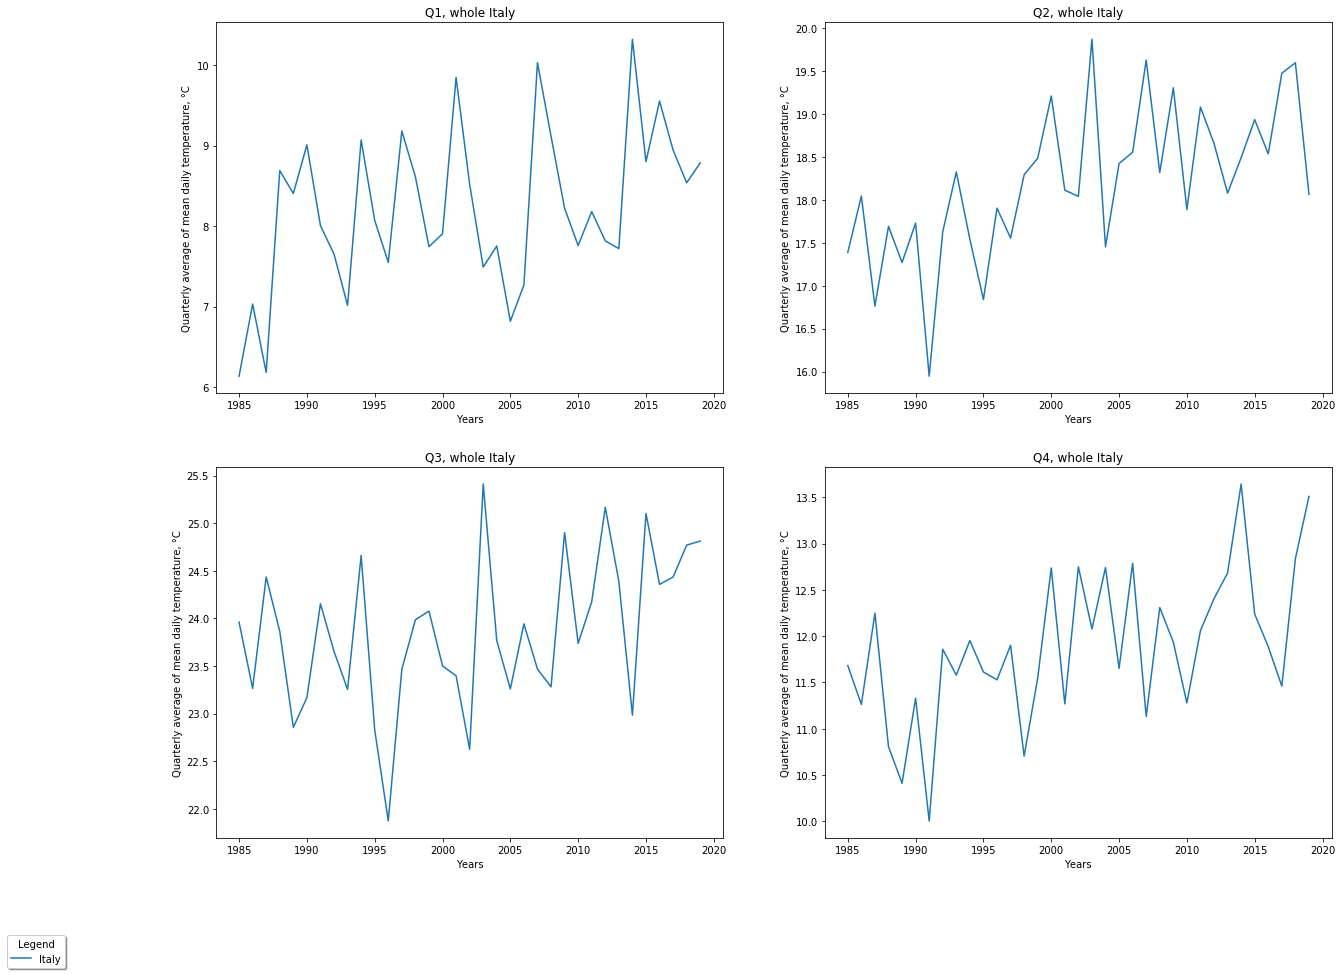

In [25]:
''' Here we can see time series of average quarterly temperatures for the Italy as a whole '''
ITA.prepare_figure(0,0)
ITA.figure()

## Here we can see the variance of average temperatures in the all Italy. As we expected, the second and fourth quarters are following the same trend.

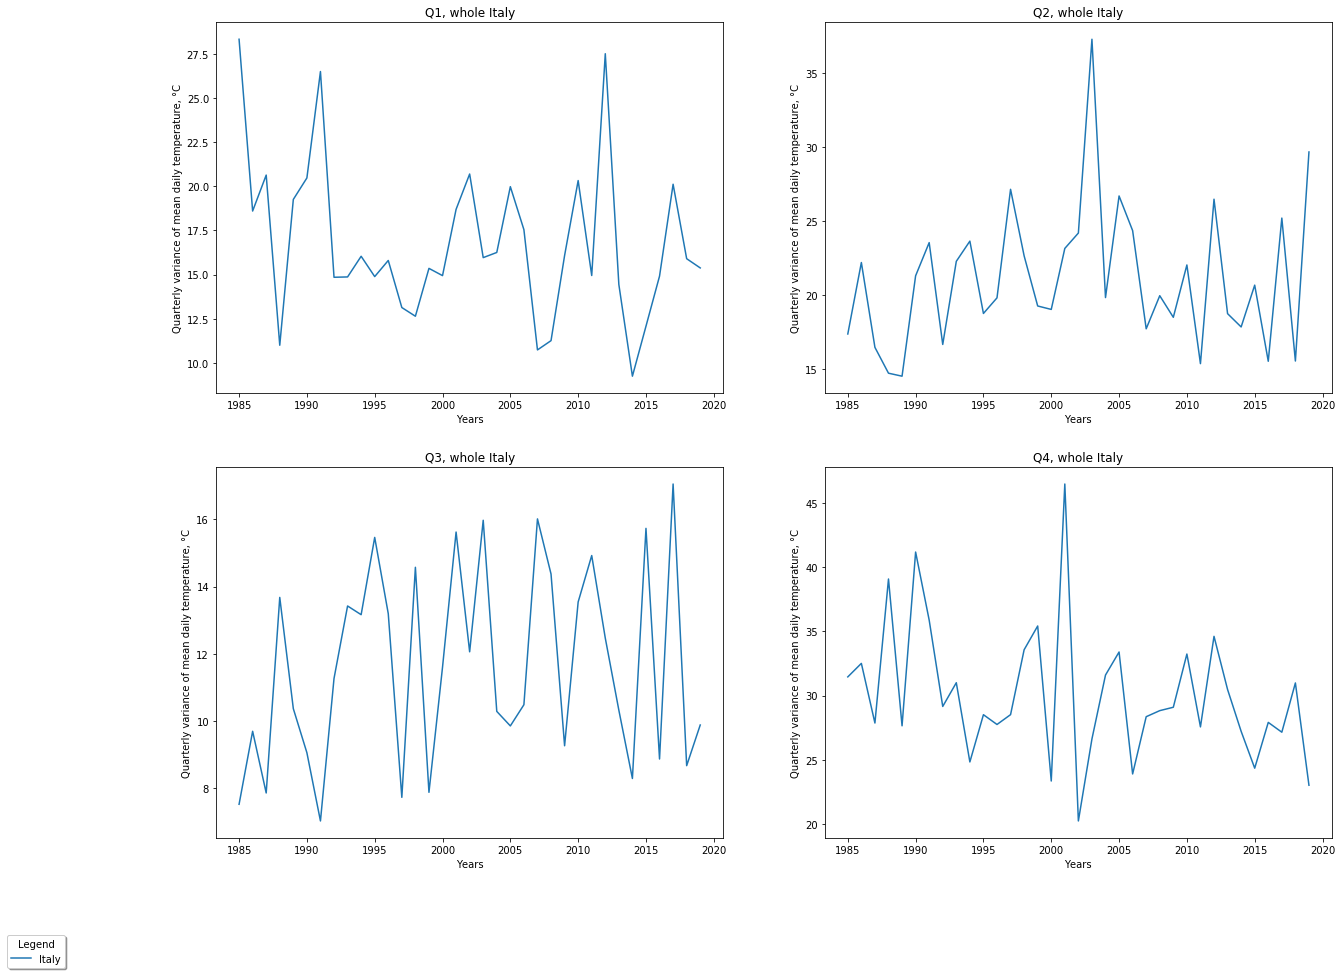

In [26]:
''' Here we can see time series of variance of quarterly temperatures for Italy as a whole '''
ITA.prepare_figure(0,1)
ITA.figure()

## Below we see evolution of average temperatures in Roma and Bergamo. While Roma is located in central Italy, Bergamo is in more montainous northern region. Despite that we see that during some years the temperature in the spring and summer were higher or nearly the same in Bergamo when compared to Roma.

In [27]:
ITA.subsetting_cities(["Roma","Bergamo"])

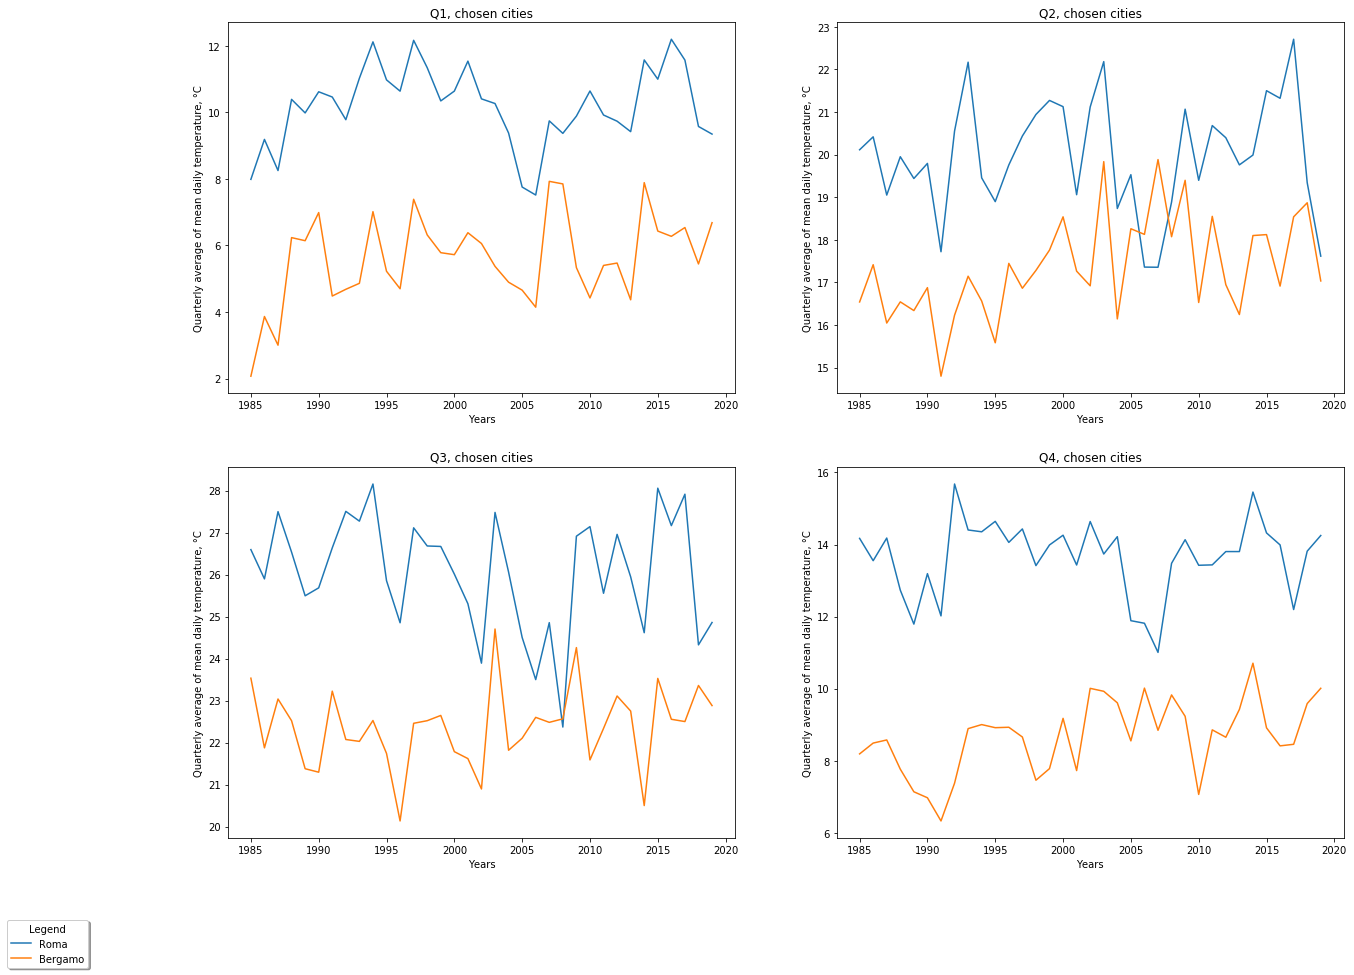

In [28]:
''' What about average quarterly temperature in Roma and Bergamo'''
ITA.prepare_figure(0,0,sub_cities=1)
ITA.figure()

## We can also plot demeaned time series to compare relative evolution of temperatures.

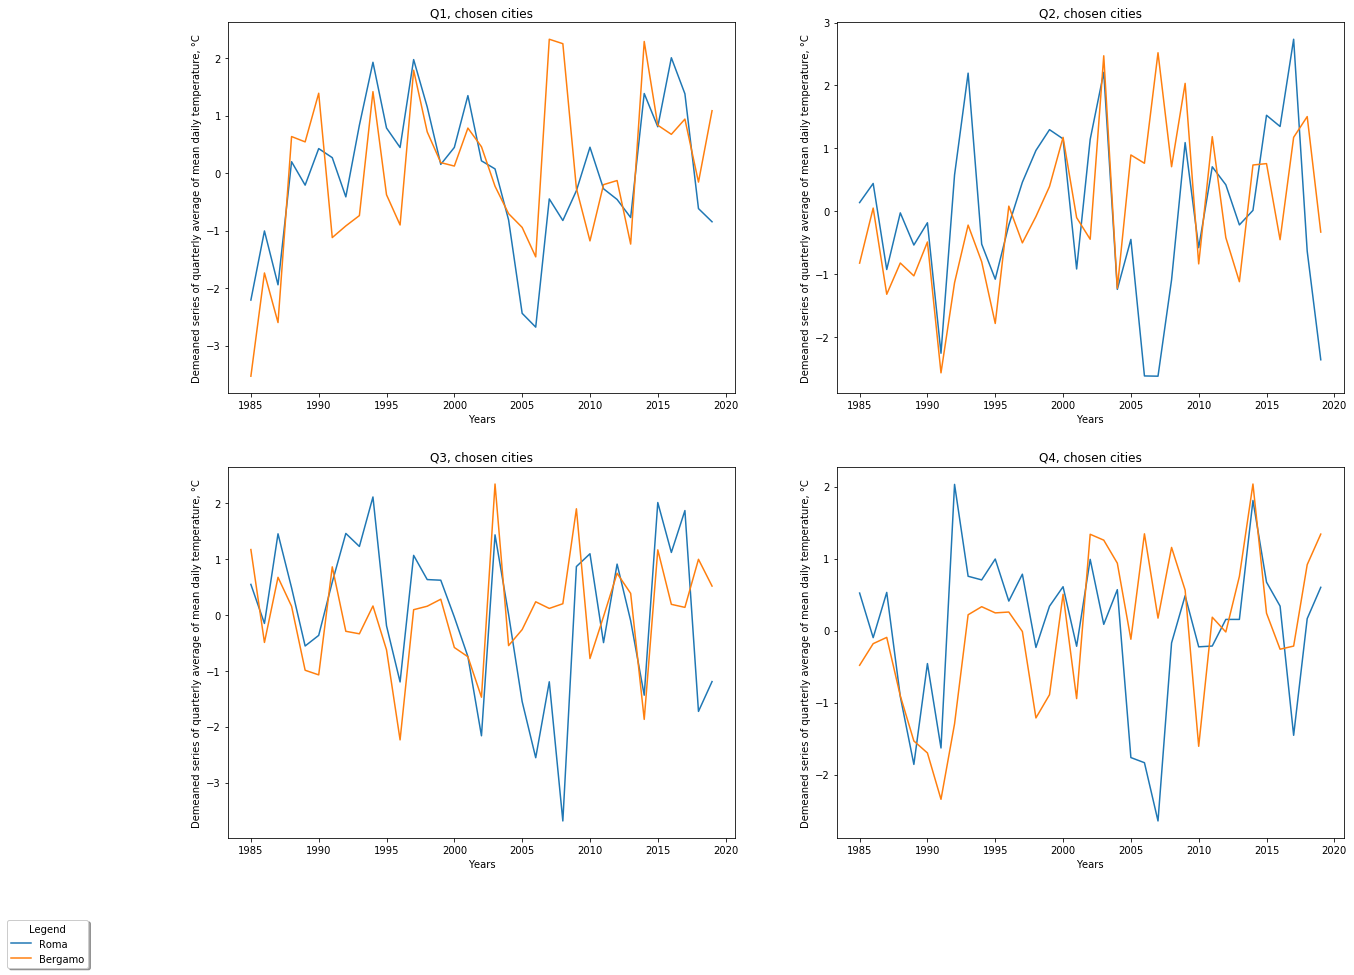

In [29]:
''' What about demeaned average quarterly temperature in Roma and Bergamo'''
ITA.prepare_figure(0,2,sub_cities=1)
ITA.figure()

## As we did for Roma and Bergamo, we can do for all of the cities at once.
## Below we can see the evolution of average temperatures during respective quarters for all of the 52 cities in our dataset. This gives us a nice picture of the differences across the Italy (and what a colorful country it is). We can see that often peaks and bottoms in average temperatures happen at the same time across the cities. The range of the different temperatures across the cities tends to be the smallest during spring and the biggest during autumn. We do not see any dramatic trends or shifts in temperatures although in the second quarter, most of the cities average temperature seem to be moved somewhat upward in later periods when compared to earlier ones. Let's now take a look at the graphs of deamened average temperatures.

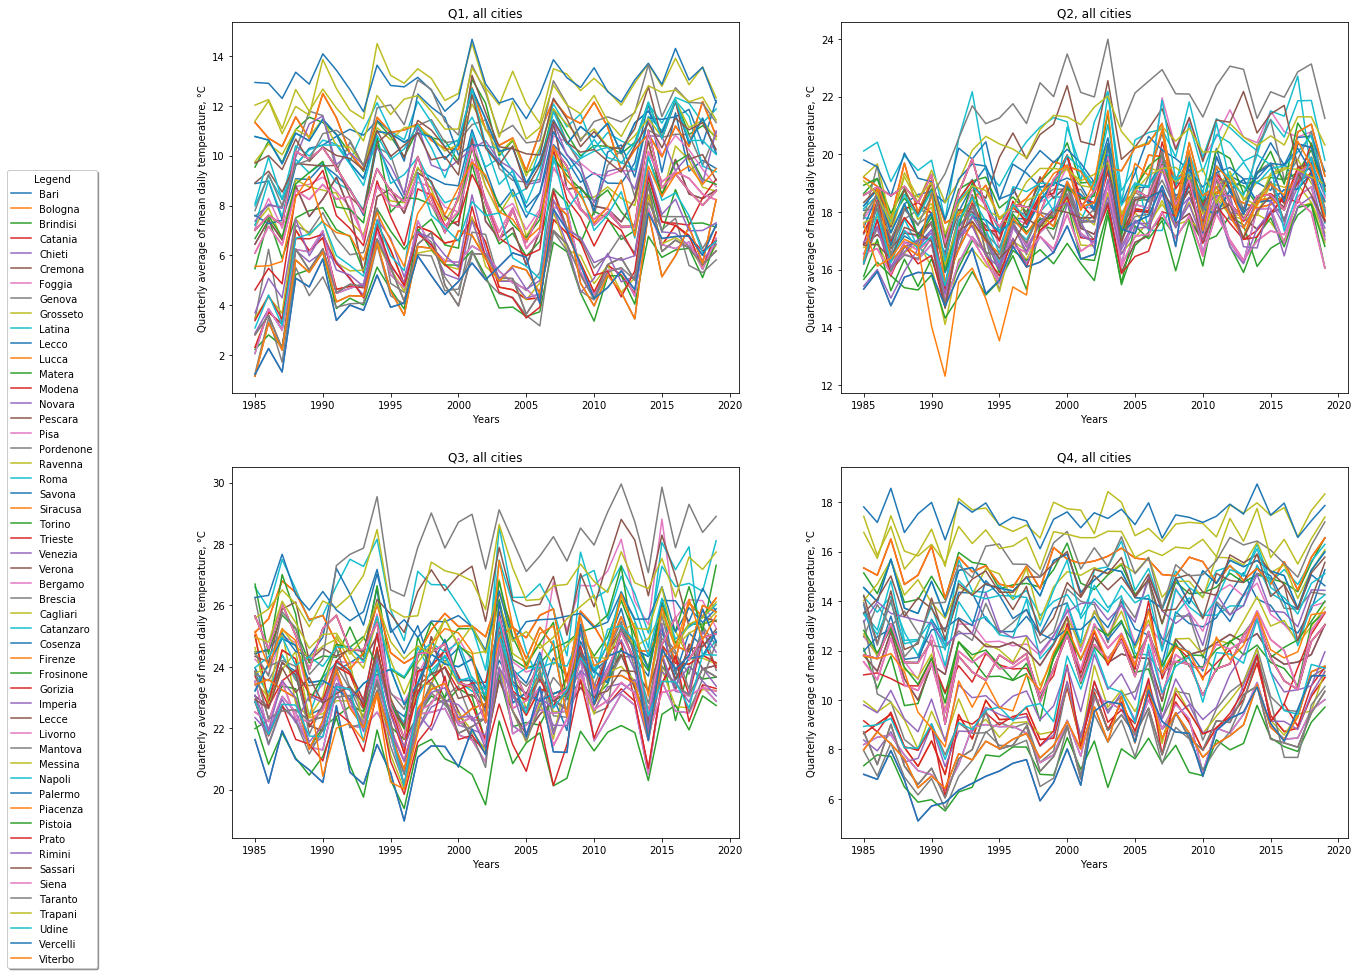

In [30]:
''' Evolution of average quarterly temperature across all 52 cities in our dataset '''
ITA.prepare_figure(0,0,cities=1)
ITA.figure()

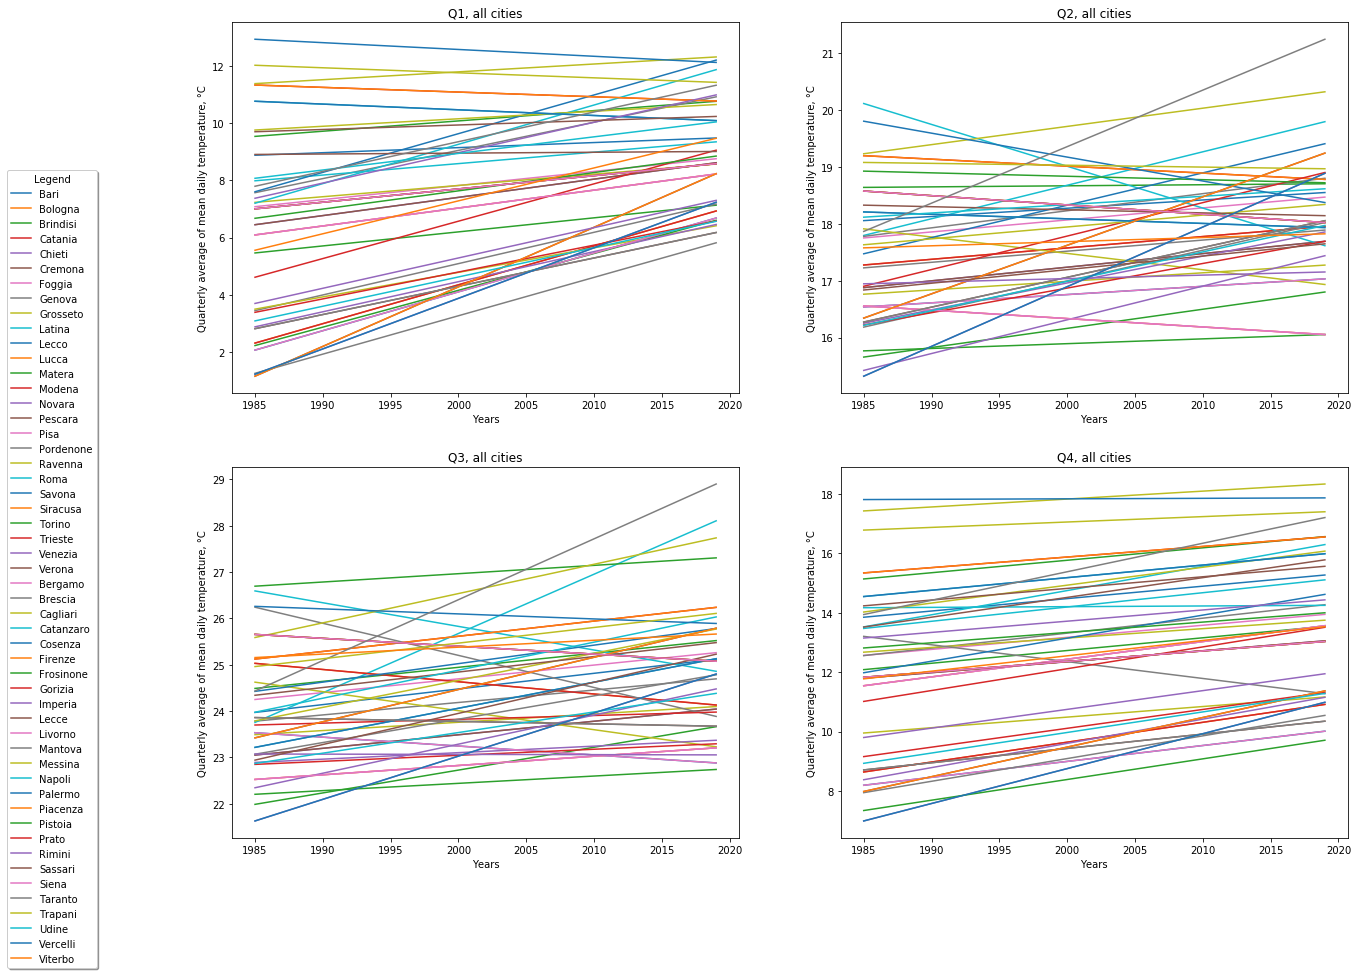

In [33]:
''' Change between the start and end year of average quarterly temperature across all 52 cities in our dataset '''
ITA.prepare_figure(0,0,cities=1)
ITA.figure([1985,2019])

## These graphs below confirm our previous observation that extremes of temperature are correlated to each others across the cities. We can see that the highest peakes are usually observed in later periods where the bottoms tend to be lower in earlier periods. Most of the cities temperatures are oscilating within the 3° of the time series' mean.

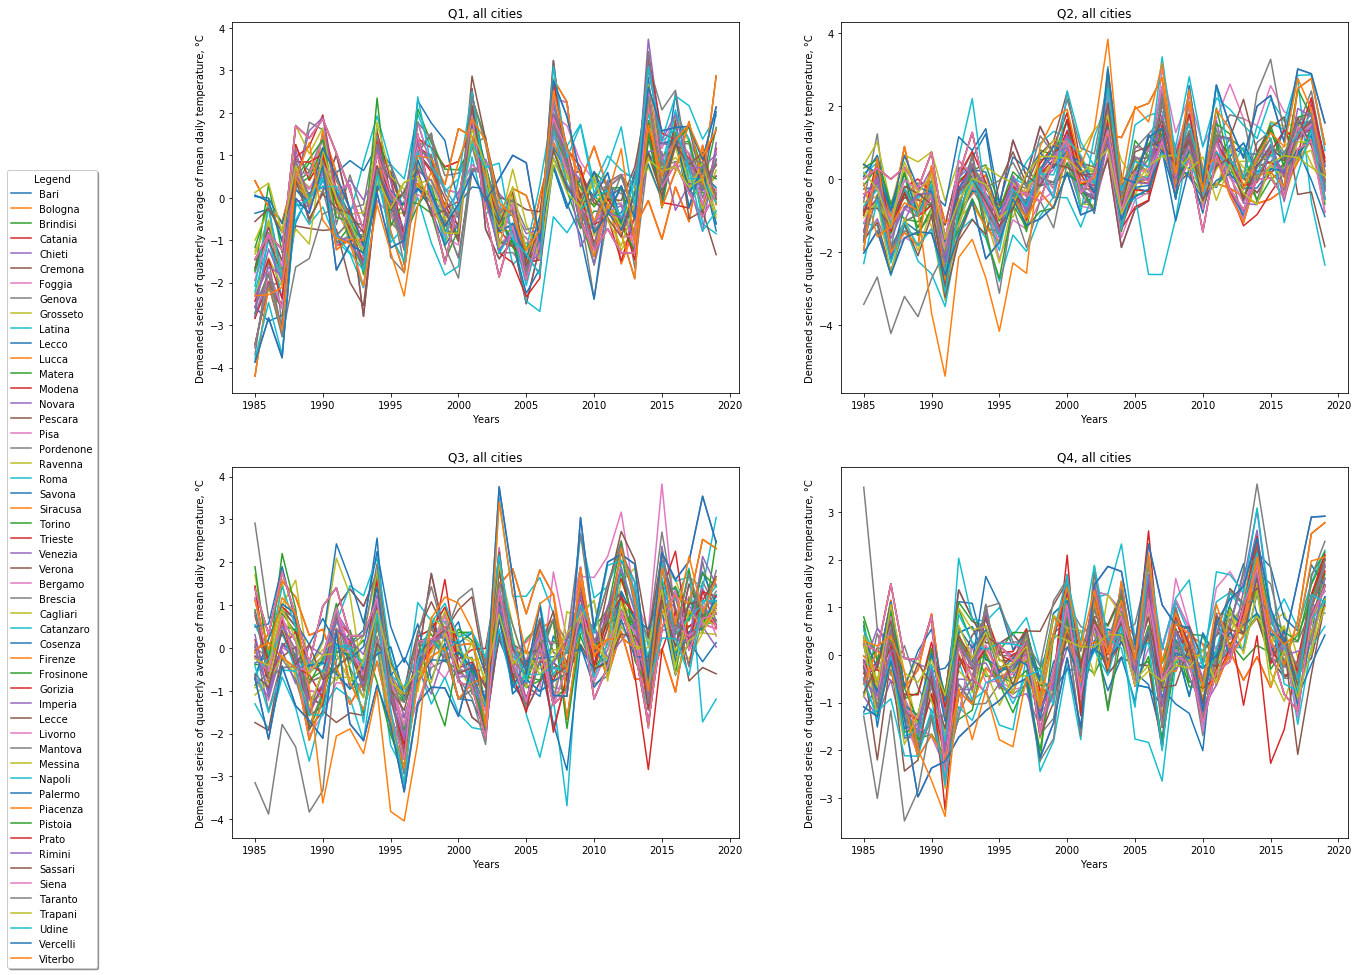

In [34]:
''' Now we can take a look at evolution of demeaned average quarterly temperature across all 52 cities in our dataset '''
ITA.prepare_figure(0,"demeaned",cities=1)
ITA.figure()

## On an example of Messina and Ravenna below, we see that the overall trend in humidity is downword. This is in line with the article of European Union about climate change (https://ec.europa.eu/clima/change/consequences_en). In summer the trend is clearly visible. Although we do not have  data for the variable "precipitation" after 2010 (seen from the graphs later on), we can see from the graph above that cities like "Messina", that is situated at the south of Italy, is experiencing droughts during all quarters. Ravenna that is well known as one of the most humid cities of Italy experienced the same trend during autumn season.

In [35]:
ITA.subsetting_cities(["Ravenna","Messina"])

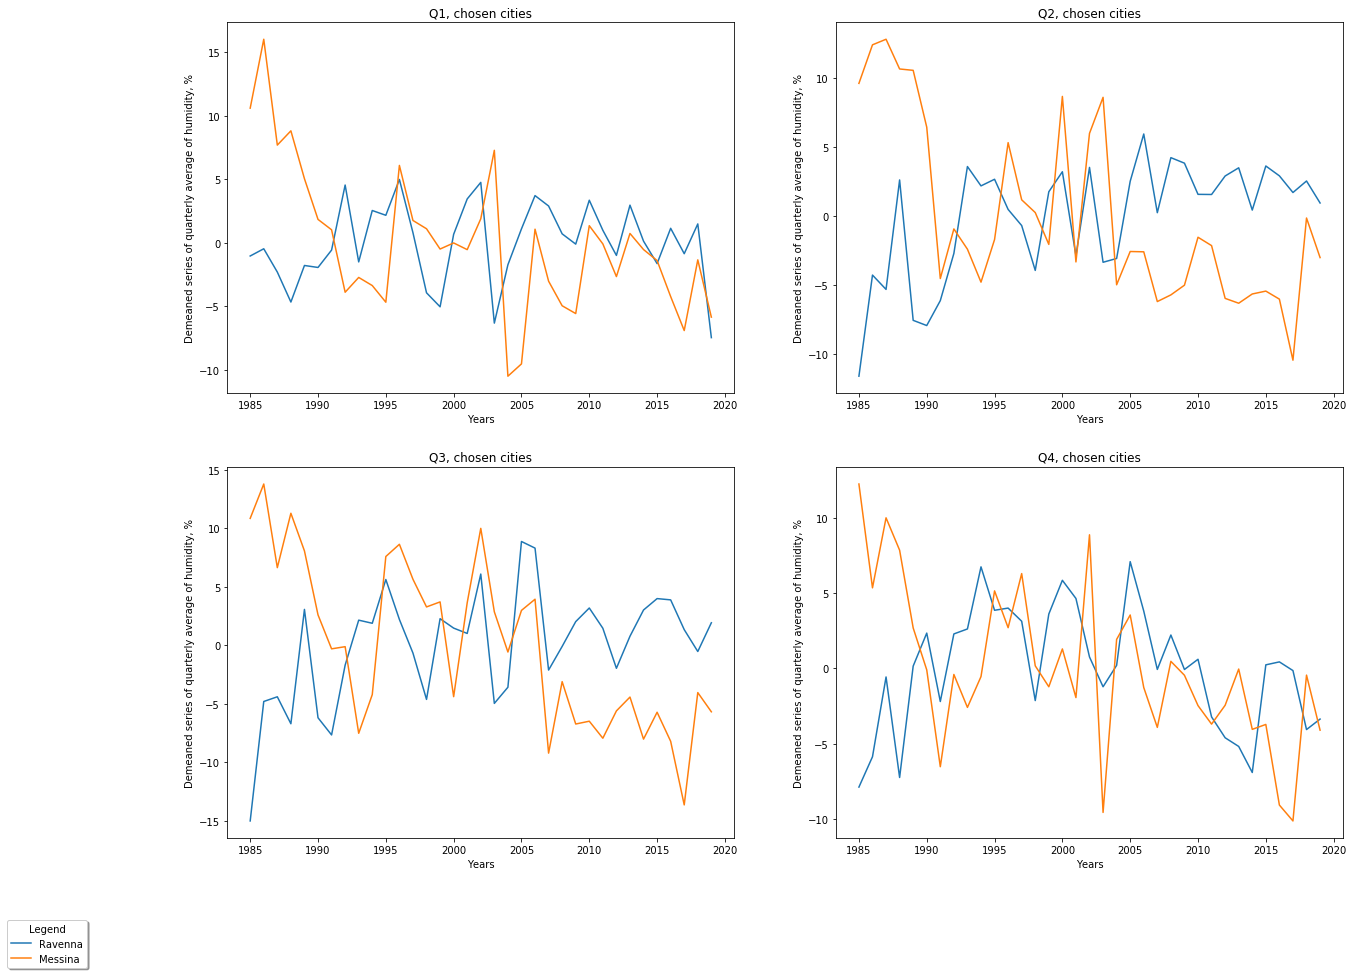

In [36]:
''' Demeaned humidity in an example of Ravenna and Messina '''
ITA.prepare_figure("humidity",2,sub_cities=1)
ITA.figure()

## Graphs below show the average of humidity in the all Italy. During the spring and winter we observe a strong variation in the average temperature after the 2000s, it means that humidity decreased and we suppose that this phenomen is due to the decreasing of precipitation, for which we do not have any data after 2010. The summer is the most arid season of the year and the trend is dramatic during the latest years, about 6 point less than the earliest ones.
## It could be interesting to see how this change in humidity could have affected agriculture in the southern regions of Italy.

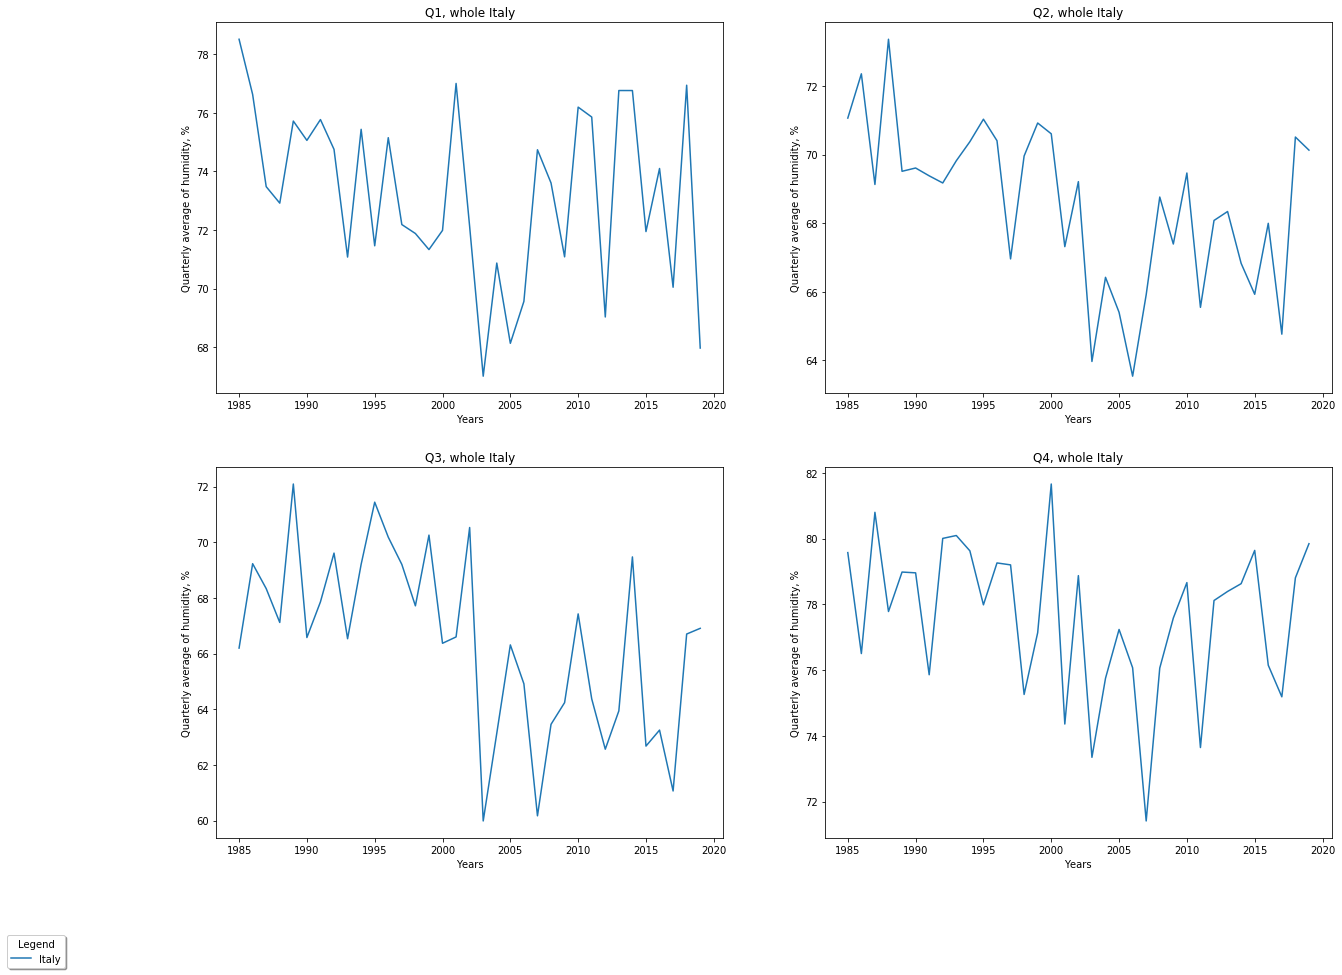

In [37]:
ITA.prepare_figure("humidity",0)
ITA.figure()

## Graph below shows the difference between min temperature and max temperature. Spring and Summer seem to have the same pattern during years. We guess that mayby nights are getting warmer in the latest than earliest.

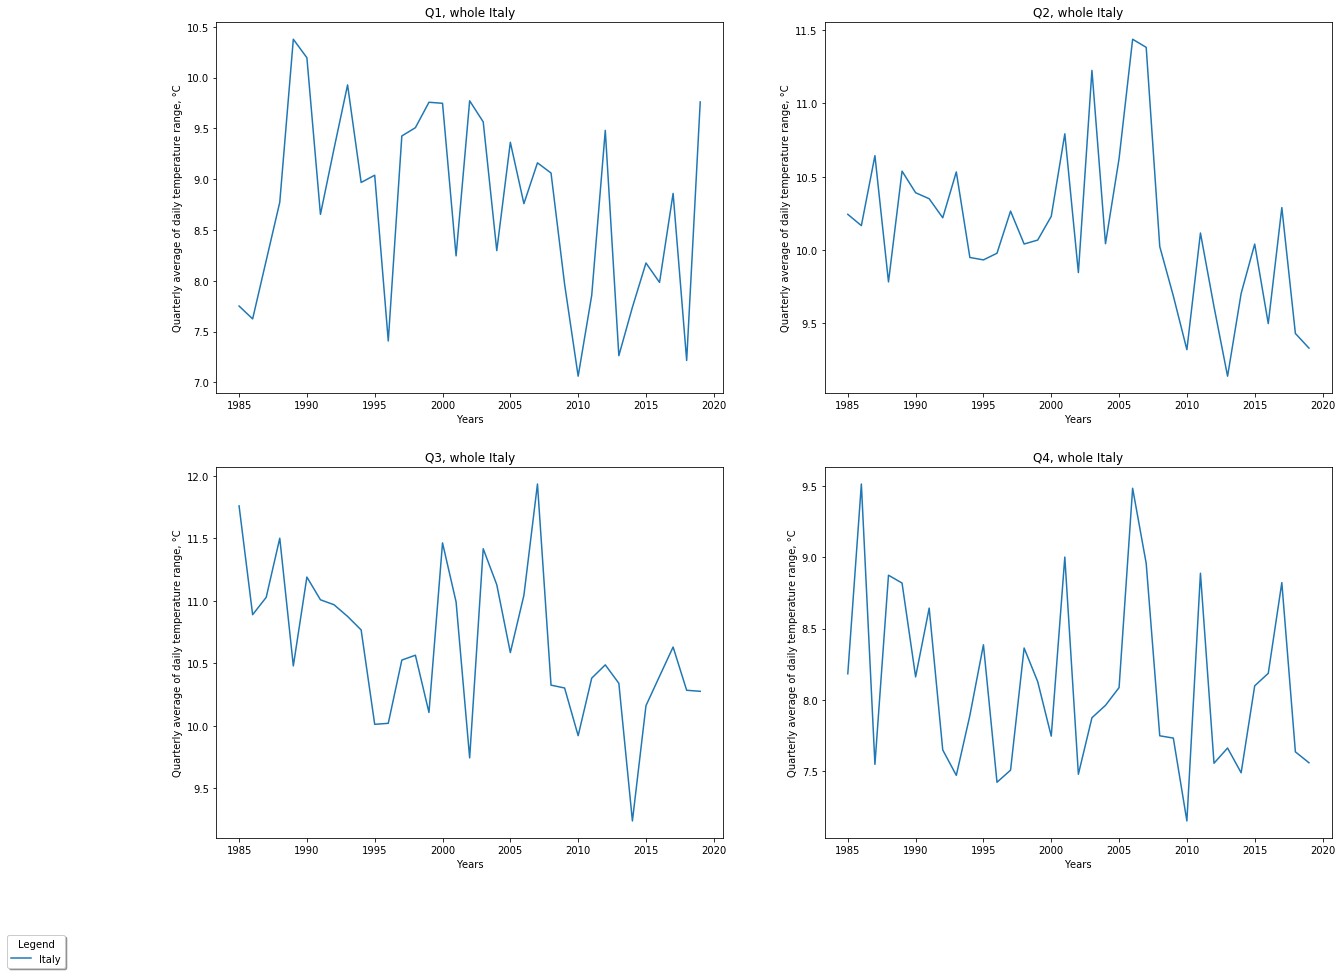

In [38]:
ITA.prepare_figure("T diff",0)
ITA.figure()

## Some other graphs for the rest of the variables are given below.

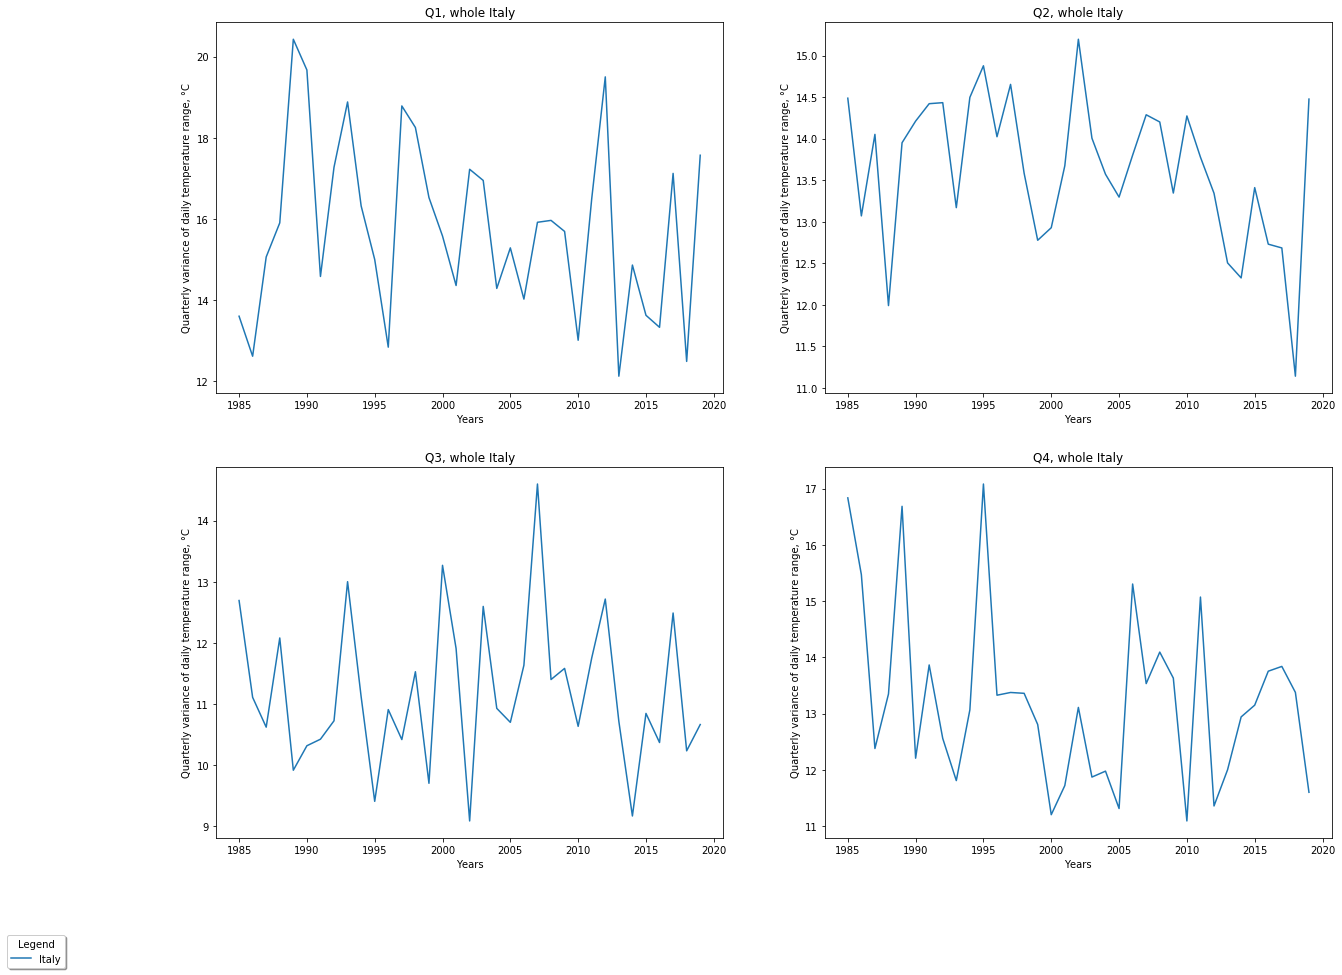

In [39]:
ITA.prepare_figure("T diff",1)
ITA.figure()

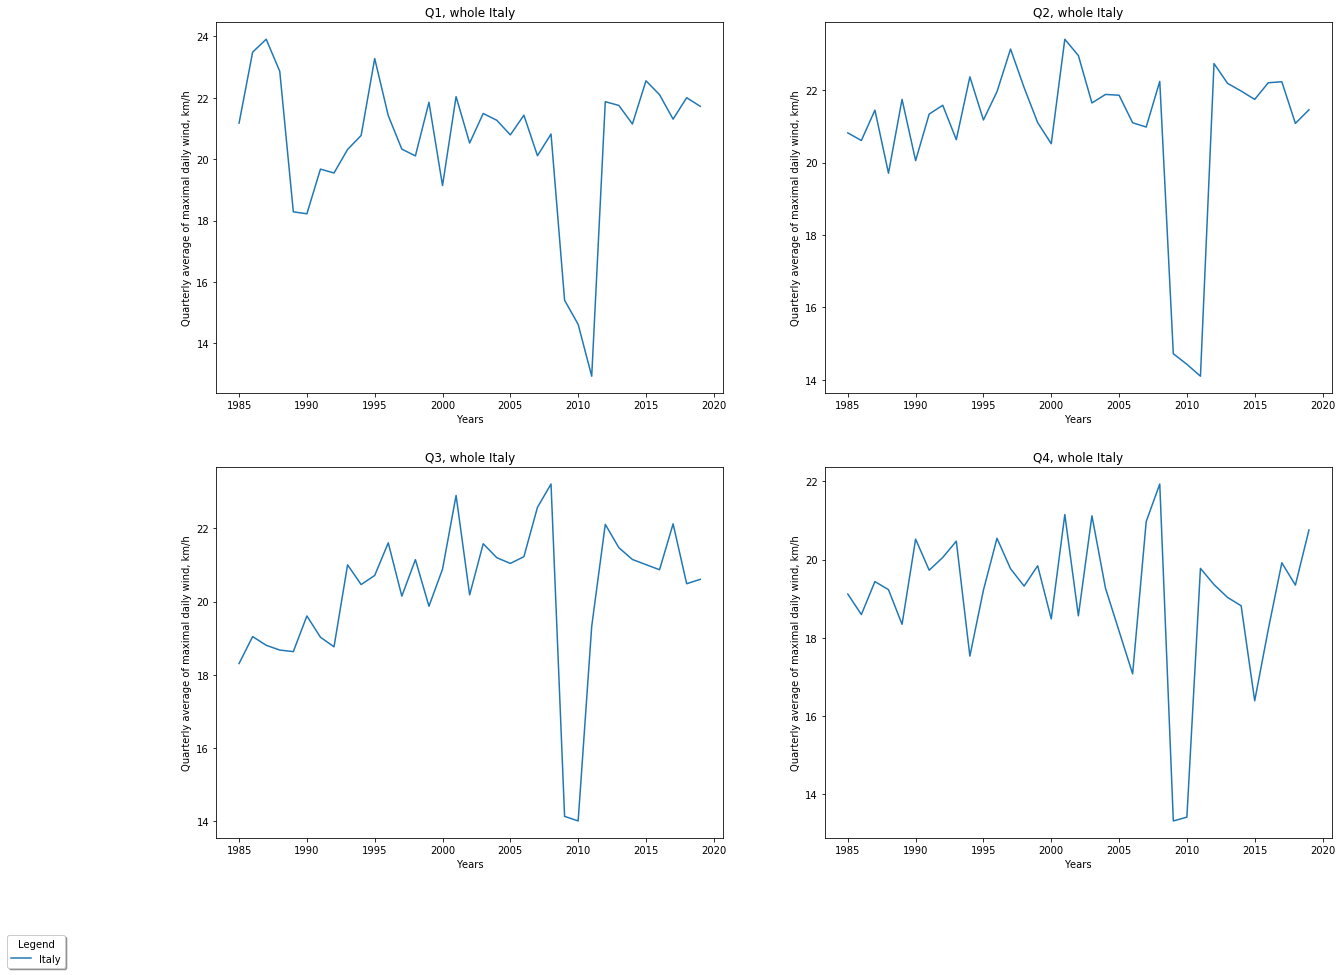

In [40]:
ITA.prepare_figure("wind",0)
ITA.figure()

## As already mentioned, data for precipitation since 2010 are not provided by our data tables.

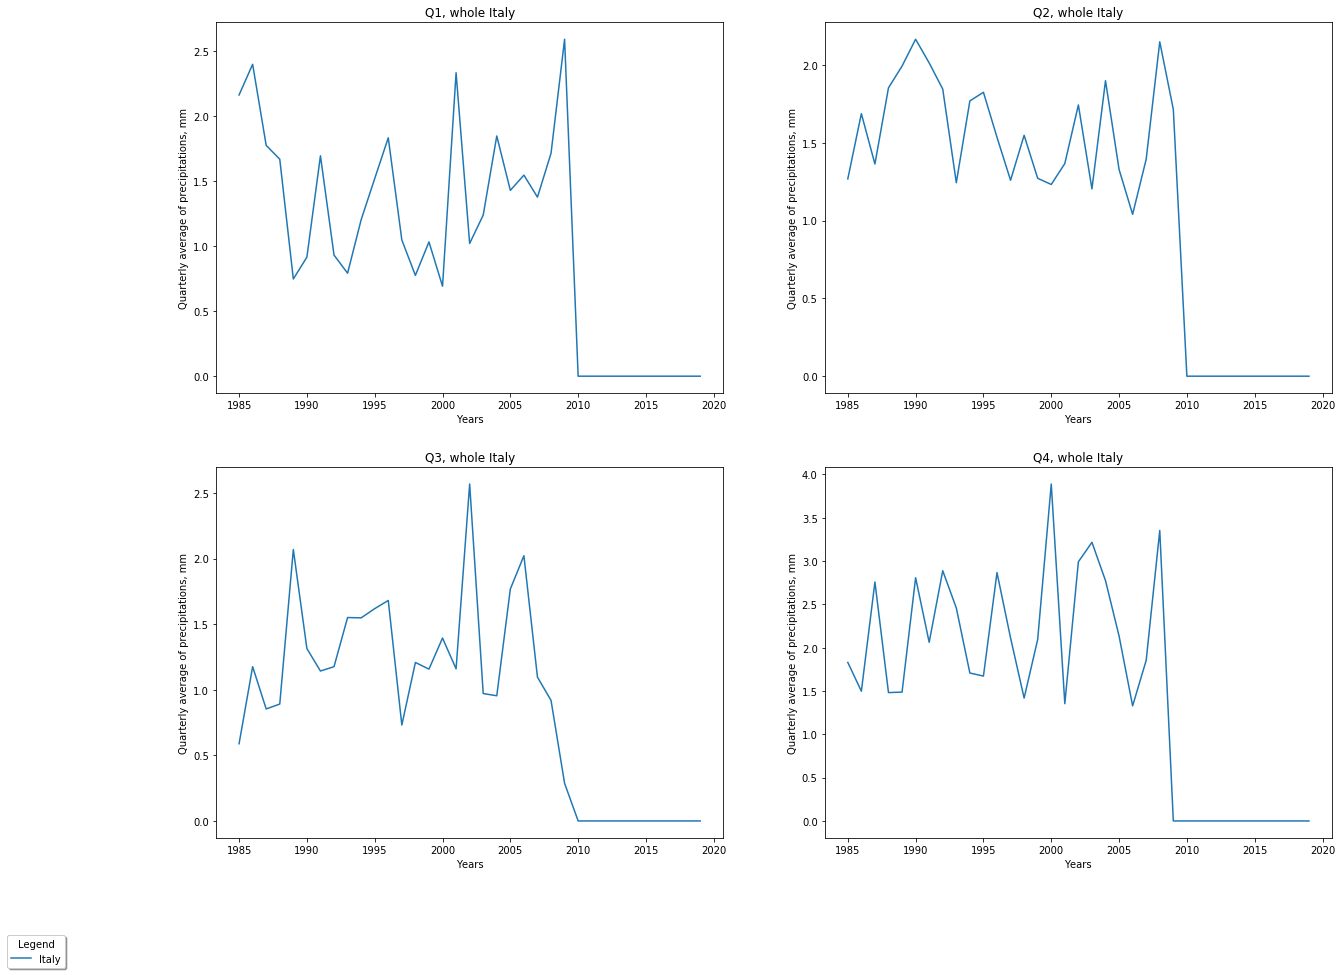

In [41]:
ITA.prepare_figure("prec",0)
ITA.figure()
#the website stop collecting data for "precipitation" variable after 2010.

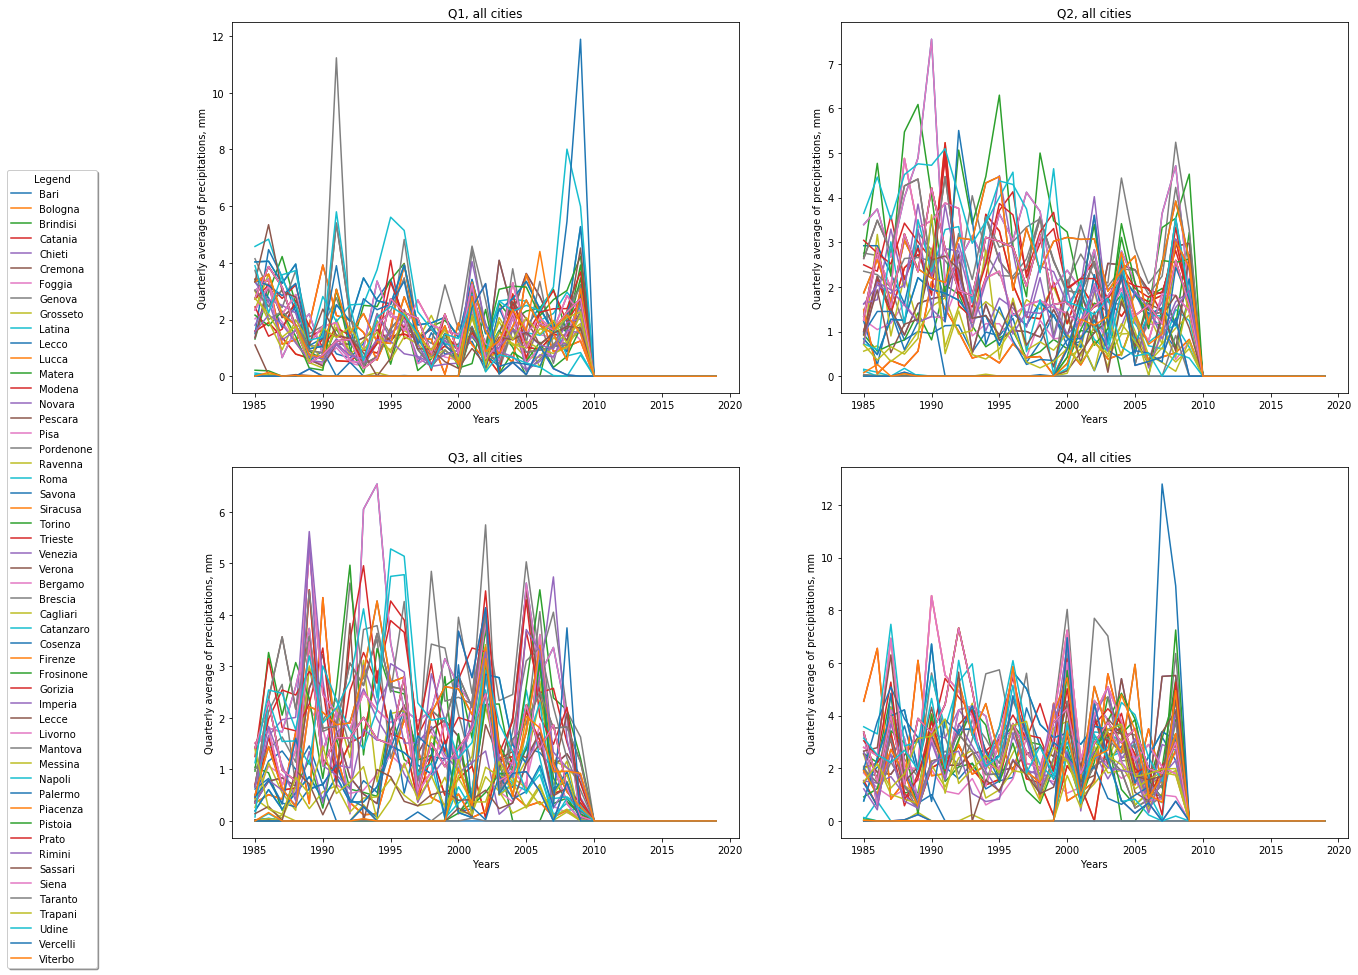

In [42]:
ITA.prepare_figure("prec",0,cities=1)
ITA.figure()

## Some examples of variances across time:

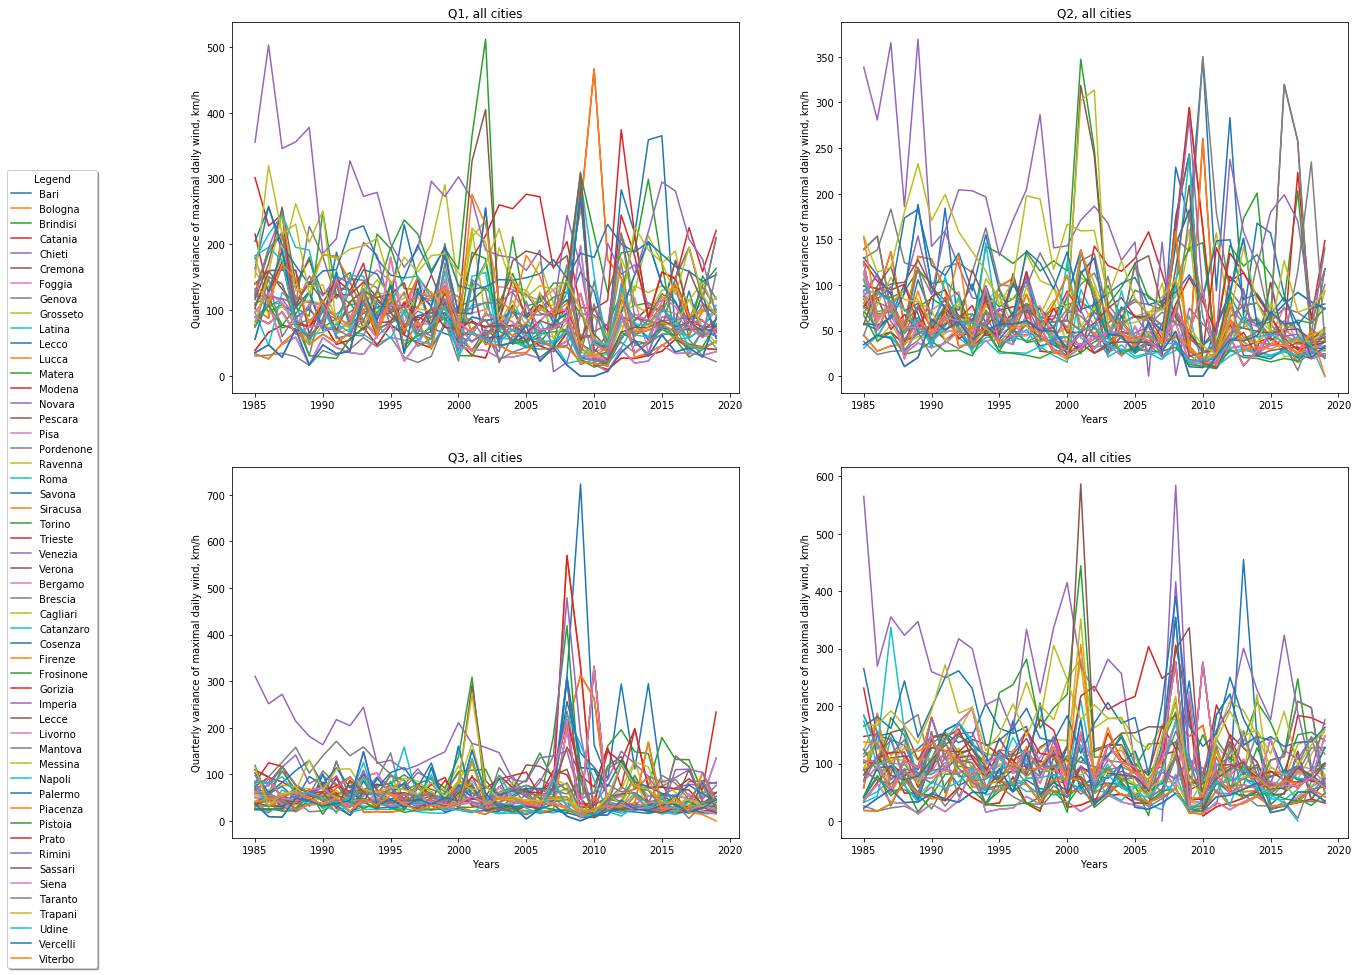

In [43]:
'''  Variance of daily maximal wind across all cities  '''
ITA.prepare_figure("wind","var",cities=1)
ITA.figure()

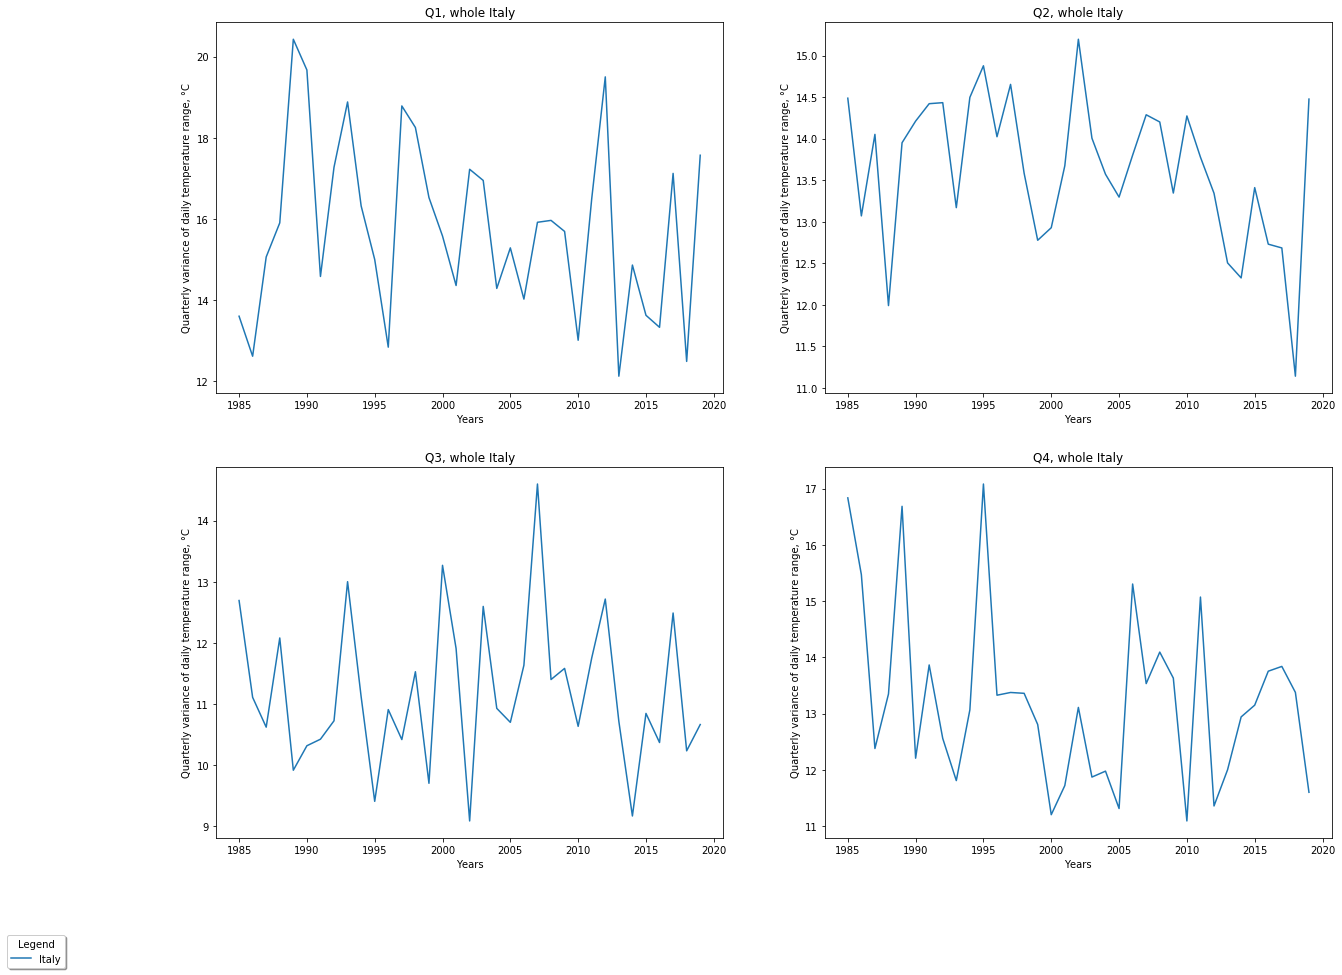

In [44]:
ITA.prepare_figure("T diff",1)
ITA.figure()